Intro to Data Structures
====

We’ll start with a quick, non-comprehensive overview of the fundamental data structures in pandas to get you started. The fundamental behavior about data types, indexing, and axis labeling / alignment apply across all of the objects. To get started, import numpy and load pandas into your namespace:

我们将首先快速，非全面地概述大熊猫中的基本数据结构，以帮助您入门。关于数据类型，索引和轴标记/对齐的基本行为适用于所有对象。首先，将numpy和pandas导入到命名空间中：

In [213]:
import pandas as pd
import numpy as np

Here is a basic tenet to keep in mind: data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.

这是一个要记住的基本原则：数据对齐是固有的。除非您明确说明，否则标签和数据之间的链接不会被破坏。

We’ll give a brief intro to the data structures, then consider all of the broad categories of functionality and methods in separate sections.

我们将简要介绍数据结构，然后在单独的部分中考虑所有大类功能和方法。

# Series

[`Series`](http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.Series.html#pandas.Series) is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to create a Series is to call:

Series是一维标记的数组，能够保存任何数据类型（整数，字符串，浮点数，Python对象等）。轴标签统称为索引。创建系列的基本方法是调用：

`s = pd.Series(data, index=index)`

Here, `data` can be many different things:

> - a Python dict
> - an ndarray
> - a scalar value (like 5)

The passed **index** is a list of axis labels. Thus, this separates into a few cases depending on what **data** is:

传递的索引是轴标签列表。 因此，根据数据的不同，这可分为几种情况：

**From ndarray**

If `data` is an ndarray, **index** must be the same length as **data**. If no index is passed, one will be created having values `[0, ..., len(data) - 1]`.

## 从 ndarray

如果`data`是一个ndarray, **index**必须与**data**长度相同。如果不传递index，将创建一个index，`index = [0, ..., len(data) - 1]`

In [214]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

s

a    0.576404
b   -0.232578
c    2.019225
d   -0.213543
e    0.055682
dtype: float64

In [215]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [216]:
pd.Series(np.random.randn(5))

0    0.083869
1    0.488719
2    0.683627
3   -1.158696
4    0.029244
dtype: float64

**Note** Starting in v0.8.0, pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time. The reason for being lazy is nearly all performance-based (there are many instances in computations, like parts of GroupBy, where the index is not used).

**注意** 从v0.8.0开始，pandas支持非唯一索引值。 如果尝试不支持多重索引值的操作，则会在此时引发异常。 懒惰的原因几乎都是基于性能的（计算中有很多实例，比如GroupBy中没有使用索引的部分）。

**From dict**

If `data` is a dict, if **index** is passed the values in data corresponding to the labels in the index will be pulled out. Otherwise, an index will be constructed from the sorted keys of the dict, if possible.

## 来自dict

如果`data`是一个dict，如果**index**被传递，则将拉出与索引中标签对应的数据中的值。否则，如果可能，将从dict的排序键构造索引。

In [217]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}

In [218]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [219]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

**Note** `NaN` (not a number) is the standard missing data marker used in pandas

**From scalar value** 

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**

## 来自标量值

如果`data`是标量值，则必须提供索引。 将重复该值以匹配**索引的长度**

In [220]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

## Series is dict-like

A Series is like a fixed-size dict in that you can get and set values by index label:

Series类似于固定大小的dict，您可以通过索引标签获取和设置值：

In [221]:
s['a']

0.5764041758699

In [222]:
s['e']

0.0556821303911868

In [223]:
s

a    0.576404
b   -0.232578
c    2.019225
d   -0.213543
e    0.055682
dtype: float64

In [224]:
'e' in s

True

In [225]:
'f' in s

False

If a label is not contained, an exception is raised:

如果标签不包含在里面，将触发一个错误：

In [226]:
# s['f']

Using the `get` method, a missing label will return None or specified default:

使用`get`方法，缺少的标签将返回None或指定的默认值：

In [227]:
s.get('f')

In [228]:
s.get('f', np.nan)

nan

See also the [section on attribute access](http://pandas.pydata.org/pandas-docs/version/0.20.3/indexing.html#indexing-attribute-access).

**Vectorized operations and label alignment with Series**

When doing data analysis, as with raw NumPy arrays looping through Series value-by-value is usually not necessary. Series can also be passed into most NumPy methods expecting an ndarray.

### 使用Series进行矢量化操作和标签对齐

在进行数据分析时，通常不需要像原始NumPy数组那样通过 Series 逐个值循环。Seires 也可以传递给大多数期待一个 ndarray 的NumPy方法。

In [229]:
s + s

a    1.152808
b   -0.465155
c    4.038450
d   -0.427087
e    0.111364
dtype: float64

In [230]:
s * 2

a    1.152808
b   -0.465155
c    4.038450
d   -0.427087
e    0.111364
dtype: float64

In [231]:
np.exp(s)

a    1.779628
b    0.792488
c    7.532484
d    0.807717
e    1.057262
dtype: float64

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

Series和ndarray之间的主要区别在于Series之间的操作会根据标签自动对齐数据。 因此，您可以在不考虑所涉及的系列是否具有相同标签的情况下编写计算。

In [232]:
s[1:] + s[:-1]

a         NaN
b   -0.465155
c    4.038450
d   -0.427087
e         NaN
dtype: float64

The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

未对齐Series之间的操作结果将包含所涉及的索引的并集。 如果在一个Sries或另一个Series中找不到标签，结果将被标记为缺少NaN。 能够在不进行任何明确数据对齐的情况下编写代码，可以在交互式数据分析和研究中获得巨大的自由度和灵活性。pandas数据结构集成的数据对齐功能使pandas有别于大多数用于处理标签数据的相关工具。

**Note**

In general, we chose to make the default result of operations between differently indexed objects yield the**union** of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the **dropna** function.

**注意**

通常，我们选择使不同索引对象之间的操作的默认结果产生索引的**union**，以避免信息丢失。尽管缺少数据，但索引标签通常是重要信息，作为计算的一部分。您当然可以选择通过**dropna**函数删除缺少数据的标签。

### Name attribute

Series can also have a `name` attribute:

In [233]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -1.512327
1   -1.420394
2    0.161619
3    0.609511
4   -0.980661
Name: something, dtype: float64

In [234]:
s.name

'something'

The Series `name` will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see below.

New in version 0.18.0.

You can rename a Series with the [`pandas.Series.rename()`](http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.Series.rename.html#pandas.Series.rename) method.

Series`name`将在很多情况下自动分配，特别是在获取DataFrame 的 1D 切片时，如下所示。

版本0.18.0中的新功能。

您可以使用[`pandas.Series.rename()`](http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.Series.rename.html#pandas) 方法重命名Series。

In [235]:
s2 = s.rename("different")

In [236]:
s2.name

'different'

Note that `s` and `s2` refer to different objects.

**注意** `s` 和 `s2` 引用不同的对象。

**DataFrame**

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

## DataFrame

** DataFrame **是一个二维标记数据结构，其中包含可能不同类型的列。 您可以将其视为电子表格或SQL表，或Series对象的字典。 它通常是最常用的pandas对象。 与Series类似，DataFrame接受许多不同类型的输入：

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- [Structured or record](http://docs.scipy.org/doc/numpy/user/basics.rec.html) ndarray
- A `Series`
- Another `DataFrame`

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

除了数据，您还可以选择传递**index**（行标签）和**columns**（列标签）参数。 如果传递 index 和/或 columns，则可以保证生成的DataFrame的索引和/或列。 因此，Series 的字典加上特定索引将丢弃与传递的索引不匹配的所有数据。

如果未传递轴标签，则将根据常识规则从输入数据构造它们。

**From dict of Series or dicts**

The result **index** will be the **union** of the indexes of the various Series. If there are any nested dicts, these will be first converted to Series. If no columns are passed, the columns will be the sorted list of dict keys.

### 来自Series的字典或字典 
结果**index**将是各Series indexes 的**union**。 如果有任何嵌套的dicts，这些将首先转换为Series。 如果没有传递列，则列将是dict键的排序列表。

In [237]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
      'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

dfa = pd.DataFrame(d)
dfa

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [238]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [239]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

通过访问**index**和**columns**属性，可以分别访问行和列标签：

**Note** When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.

**注意** 当一组特定的列与数据的dict一起传递时，传递的列将覆盖dict中的键。

In [240]:
 dfa.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [241]:
dfa.columns

Index(['one', 'two'], dtype='object')

**From dict of ndarrays / lists**

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

### 来自ndarrays / lists的dict

ndarrays必须都是相同的长度。 如果传递索引，则它必须明显与数组的长度相同。 如果没有传递索引，结果将是`range（n）`，其中`n`是数组长度。

In [242]:
d = {'one' : [1., 2., 3., 4.],'two' : [4., 3., 2., 1.]}

In [243]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [244]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


**From structured or record array**

This case is handled identically to a dict of arrays.

### 来自结构化或记录数组

这种情况的处理方式与数组的字典相同。

In [245]:
dfB = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])

In [246]:
dfB[:] = [(1,2.,'Hello'), (2,3.,"World")]

pd.DataFrame(dfB)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [247]:
 pd.DataFrame(dfB, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [248]:
pd.DataFrame(dfB, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


**Note** DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

**注意** DataFrame并不像二维NumPy ndarray那样工作。

**From a list of dicts**

### 从字典列表



In [249]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [250]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


pd.DataFrame(data2, columns=['a', 'b'])

**From a dict of tuples**

You can automatically create a multi-indexed frame by passing a tuples dictionary

### 来自元组的字典

您可以通过传递元组字典自动创建多索引框架

In [251]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

**From a Series**

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

### 来自一个Series

结果将是一个与输入Series具有相同索引的DataFrame，以及一个列，其名称是Series的原始名称（仅当没有提供其他列名时）。

**Missing Data**

Much more will be said on this topic in the [Missing data](http://pandas.pydata.org/pandas-docs/version/0.20.3/missing_data.html#missing-data) section. To construct a DataFrame with missing data, use `np.nan` for those values which are missing. Alternatively, you may pass a `numpy.MaskedArray` as the data argument to the DataFrame constructor, and its masked entries will be considered missing.

**缺失数据**

在[缺失数据](http://pandas.pydata.org/pandas-docs/version/0.20.3/missing_data.html#missing-data)部分中将对此主题进行更多说明。要构造有缺失数据的DataFrame，请使用`np.nan`来查找缺少的值。 或者，您可以将`numpy.MaskedArray`作为数据参数传递给DataFrame构造函数，并且其掩码条目将被视为缺失。

**Alternate Constructors**

**DataFrame.from_dict**

`DataFrame.from_dict` takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the `DataFrame` constructor except for the `orient` parameter which is `'columns'` by default, but which can be set to `'index'` in order to use the dict keys as row labels.

### 备用构造函数

**DataFrame.from_dict**

`DataFrame.from_dict`采用dicts的dict或类似数组序列的dict并返回DataFrame。 它的操作类似于`DataFrame`构造函数，除了`orient`参数，默认情况下是`'columns'`，但是可以设置为`'index'`以便使用dict键作为行标签。

**DataFrame.from_records**

`DataFrame.from_records` takes a list of tuples or an ndarray with structured dtype. Works analogously to the normal `DataFrame` constructor, except that index maybe be a specific field of the structured dtype to use as the index. For example:

**DataFrame.from_records**

`DataFrame.from_records`获取元组列表或带有结构化dtype的ndarray。 类似于普通的`DataFrame`构造函数，除了索引可能是结构化dtype的特定字段以用作索引。例如：

In [252]:
dfB

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [253]:
pd.DataFrame.from_records(dfB, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


**DataFrame.from_items**

`DataFrame.from_items` works analogously to the form of the `dict` constructor that takes a sequence of `(key, value)` pairs, where the keys are column (or row, in the case of `orient='index'`) names, and the value are the column values (or row values). This can be useful for constructing a DataFrame with the columns in a particular order without having to pass an explicit list of columns:

**DataFrame.from_items** 

`DataFrame.from_items`类似于`dict`构造函数的形式，它采用一系列`（key，value）`对，其中键是列（或行，在`orient ='index'的情况下） ）名称，值是列值（或行值）。 这对于使用特定顺序的列构造DataFrame非常有用，而无需传递明确的列列表：

**注意：** `from_items()`已被弃用，可以使用 `DataFrame.from_dict(dict(items)`代替。`DataFrame.from_dict(OrderedDict(items))`可以用于保存key顺序。

In [254]:
 pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,A,B
0,1,4
1,2,5
2,3,6


In [255]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass `orient='index'`, the keys will be the row labels. But in this case you must also pass the desired column names:

如果你传递`orient ='index'`，键将是行标签。 但在这种情况下，您还必须传递所需的列名：

In [256]:
pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])],
                        orient='index', columns=['one', 'two', 'three'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,one,two,three
A,1,2,3
B,4,5,6


In [257]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                        orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


**Column selection, addition, deletion**

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

### 列选择，添加，删除

您可以在语义上将DataFrame视为类似索引的Series对象的dict。 获取，设置和删除列的工作方式与类似的dict操作相同：

In [264]:
 dfa['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [266]:
dfa['three'] = dfa['one'] * dfa['two']

In [267]:
dfa['flag'] = dfa['one'] > 2

In [268]:
df

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


Columns can be deleted or popped like with a dict:

可以类似字典那样删除或插入（pop）列。

In [270]:
del dfa['two']

In [271]:
three = dfa.pop('three')

In [272]:
dfa

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

当插入一个标量值时，它自然会被广播到填充列：

In [273]:
dfa['foo'] = 'bar'
dfa

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

插入与DataFrame不具有相同索引的Series时，它将遵照DataFrame的索引：

In [157]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The insert function is available to insert at a particular location in the columns:

您可以插入原始ndarrays，但它们的长度必须与DataFrame索引的长度相匹配。

默认情况下，列会在末尾插入。 insert函数可用于在特定位置插入列：

In [274]:
dfa.insert(1, 'bar', dfa['one'])
dfa

,one,bar,flag,foo
a,1.0,1.0,False,bar
b,2.0,2.0,False,bar
c,3.0,3.0,True,bar
d,NaN,NaN,False,bar


**Assigning New Columns in Method Chains**

New in version 0.16.0.

Inspired by [dplyr’s](http://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html#mutate) `mutate` verb, DataFrame has an [`assign()`](http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.DataFrame.assign.html#pandas.DataFrame.assign) method that allows you to easily create new columns that are potentially derived from existing columns.

### 在方法链中分配新列

版本0.16.0中的新功能。

受[dplyr's](http://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html#mutate) `mutate`动词的启发，DataFrame有一个[`assign()`](http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.DataFrame.assign.html#pandas.DataFrame.assign)方法，允许您轻松创建可能从现有列派生的新列。

In [275]:
iris = pd.read_csv('iris.csv')

In [276]:
iris

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
5,5,5.4,3.9,1.7,0.4
6,6,4.6,3.4,1.4,0.3
7,7,5.0,3.4,1.5,0.2
8,8,4.4,2.9,1.4,0.2
9,9,4.9,3.1,1.5,0.1


In [277]:
(iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength']).head())

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,sepal_ratio
0,0,5.1,3.5,1.4,0.2,0.686275
1,1,4.9,3.0,1.4,0.2,0.612245
2,2,4.7,3.2,1.3,0.2,0.680851
3,3,4.6,3.1,1.5,0.2,0.673913
4,4,5.0,3.6,1.4,0.2,0.720000


Above was an example of inserting a precomputed value. We can also pass in a function of one argument to be evalutated on the DataFrame being assigned to.

以上是插入预先计算的值的示例。 我们还可以传递一个参数的函数，以便在分配给的DataFrame上进行评估。

In [278]:
iris.assign(sepal_ratio = lambda x: (x['SepalWidth'] /x['SepalLength'])).head()

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,sepal_ratio
0,0,5.1,3.5,1.4,0.2,0.686275
1,1,4.9,3.0,1.4,0.2,0.612245
2,2,4.7,3.2,1.3,0.2,0.680851
3,3,4.6,3.1,1.5,0.2,0.673913
4,4,5.0,3.6,1.4,0.2,0.720000


`assign` **always** returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using `assign` in chains of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:


`assign` ** always **返回数据的副本，保持原始DataFrame不变。

当您没有对手头的DataFrame的引用时，传递可调用的，而不是要插入的实际值。 在操作链中使用`assign`时很常见。 例如，我们可以将DataFrame限制为仅包含Sepal Length大于5的观察值，计算比率，并绘制：

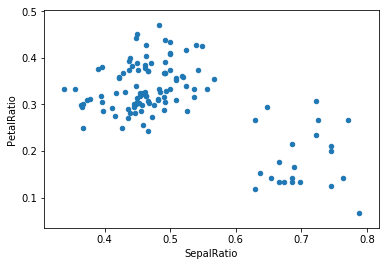

In [279]:
(iris.query('SepalLength > 5') .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
         PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
 .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

由于传入的是一个函数，因此在分配给的DataFrame上计算函数。 重要的是，已经过滤了DataFrame中那些萼片长度大于5的行e。首先进行过滤，然后进行比例计算。这是一个我们没有引用过滤的DataFrame的有效示例。

The function signature for `assign` is simply `**kwargs`. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a `Series` or NumPy array), or a function of one argument to be called on the `DataFrame`. A *copy* of the original DataFrame is returned, with the new values inserted.

`assign`的函数签名只是`** kwargs`。 键是新字段的列名，值是要插入的值（例如，`Series`或NumPy数组），或者是要在`DataFrame`上调用的一个参数的函数。 返回原始DataFrame的* * *，并插入新值。

**Warning**

Since the function signature of `assign` is `**kwargs`, a dictionary, the order of the new columns in the resulting DataFrame cannot be guaranteed to match the order you pass in. To make things predictable, items are inserted alphabetically (by key) at the end of the DataFrame.

All expressions are computed first, and then assigned. So you can’t refer to another column being assigned in the same call to `assign`. For example:

**警告**

由于`assign`的函数签名是`** kwargs`，一个字典，结果DataFrame中新列的顺序不能保证与你传入的顺序相匹配。为了使事情可预测，项目按字母顺序插入（通过 key）在DataFrame的末尾。

首先计算所有表达式，然后分配。 所以你不能引用在同一个`assign`中调用的另一列。 例如：

In [283]:
dfB = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
dfB[:] = [(1,2.,'Hello'), (2,3.,"World")]
dfB = pd.DataFrame(df)
dfB

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [284]:
# Don't do this, bad reference to `C`
dfB.assign(C = lambda x: x['A'] + x['B'], D = lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,2.0,3.0,4.0
1,2,3.0,5.0,7.0


In [285]:
# Instead, break it into two assigns
(df.assign(C = lambda x: x['A'] + x['B']).assign(D = lambda x: x['A'] + x['C']))

,A,B,C,D
0,1,2.0,3.0,4.0
1,2,3.0,5.0,7.0


### [Indexing / Selection](http://pandas.pydata.org/pandas-docs/version/0.20.3/dsintro.html#indexing-selection)

The basics of indexing are as follows:

| Operation                        | Syntax        | Result    |
| -------------------------------- | ------------- | --------- |
| Select column                    | `df[col]`       | Series    |
| Select row by label              | `df.loc[label]` | Series    |
| Select row by integer   location | `df.iloc[loc]`  | Series    |
| Slice rows                       | `df[5:10]`      | DataFrame |
| Select rows by boolean   vector  |`df[bool_vec]`  | DataFrame |



Row selection, for example, returns a Series whose index is the columns of the DataFrame:

例如，行选择返回一个Series，其索引是DataFrame的列：

In [286]:
dfa.loc['b']  #使用标签选择

one         2
bar         2
flag    False
foo       bar
Name: b, dtype: object

In [288]:
dfa.iloc[2]  #使用索引号选择

one        3
bar        3
flag    True
foo      bar
Name: c, dtype: object

For a more exhaustive treatment of more sophisticated label-based indexing and slicing, see the [section on indexing](http://pandas.pydata.org/pandas-docs/version/0.20.3/indexing.html#indexing). We will address the fundamentals of reindexing / conforming to new sets of labels in the [section on reindexing](http://pandas.pydata.org/pandas-docs/version/0.20.3/basics.html#basics-reindexing).

有关更复杂的基于标签的索引和切片的更详尽的处理，请参阅[section on indexing](http://pandas.pydata.org/pandas-docs/version/0.20.3/indexing.html#indexing)。 我们将在[section on reindexing](http://pandas.pydata.org/pandas-docs/version/0.20.3/basics.html#basics-reindexing)中讨论重新索引/符合新标签集的基础知识。

**Data alignment and arithmetic**

Data alignment between DataFrame objects automatically align on **both the columns and the index (row labels)**. Again, the resulting object will have the union of the column and row labels.

### 数据对齐和算术

DataFrame对象之间的数据对齐自动对齐**列和索引（行标签）**。 同样，生成的对象将具有列和行标签的并集。

In [289]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])

In [291]:
df

,A,B,C,D
0,-0.376302,0.521253,0.703611,0.255105
1,1.020983,0.431333,-0.099071,-1.774088
2,-0.687566,0.081152,0.098202,0.769403
3,-0.755848,0.261906,0.155756,-2.098690
4,-0.649565,-0.100501,-1.831208,0.931449
5,0.590892,1.842301,-1.034281,0.009488
6,-0.725444,0.584316,-1.628592,1.181605
7,0.429741,2.233220,-0.823277,0.871671
8,-0.030334,-3.320550,0.495874,-1.007919
9,0.545982,-0.910419,-0.893480,-2.016621


In [292]:
df2

,A,B,C
0,0.723933,-1.293300,-1.086241
1,0.782208,-0.351112,0.315195
2,-1.203646,-0.912418,0.364143
3,0.432605,-1.517637,1.224049
4,-0.174874,-1.220228,-1.350491
5,-1.003008,-0.598084,0.297213
6,-2.312401,1.587637,-0.481642


In [290]:
df + df2

,A,B,C,D
0,0.347631,-0.772047,-0.382629,NaN
1,1.803191,0.080221,0.216124,NaN
2,-1.891211,-0.831266,0.462345,NaN
3,-0.323243,-1.255731,1.379805,NaN
4,-0.824440,-1.320729,-3.181699,NaN
5,-0.412116,1.244216,-0.737069,NaN
6,-3.037845,2.171953,-2.110234,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series **index** on the DataFrame **columns**, thus [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) row-wise. For example:

在DataFrame和Series之间进行操作时，默认行为是在DataFrame **列**上对齐Series ** index **，从而[broadcast]（http://docs.scipy.org/doc/numpy/ user / basics.broadcasting.html）row-wise。 例如：

In [293]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.397285,-0.089920,-0.802682,-2.029193
2,-0.311264,-0.440102,-0.605409,0.514298
3,-0.379546,-0.259347,-0.547856,-2.353795
4,-0.273263,-0.621754,-2.534820,0.676344
5,0.967194,1.321048,-1.737893,-0.245617
6,-0.349142,0.063063,-2.332204,0.926500
7,0.806043,1.711967,-1.526888,0.616565
8,0.345968,-3.841803,-0.207738,-1.263024
9,0.922284,-1.431672,-1.597092,-2.271726


In the special case of working with time series data, and the DataFrame index also contains dates, the broadcasting will be column-wise:

在使用时间序列数据的特殊情况下，DataFrame索引还包含日期，广播将按列进行：

In [295]:
index = pd.date_range('1/1/2000', periods=8)

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))

df

,A,B,C
2000-01-01,-0.508640,2.259553,1.389519
2000-01-02,-0.715345,0.168612,-1.043313
2000-01-03,0.593534,-0.141715,-0.429016
2000-01-04,0.478414,0.716701,-0.080889
2000-01-05,0.194871,-0.835045,-0.796779
2000-01-06,-1.426271,-0.585675,-1.211103
2000-01-07,2.386003,0.079095,1.061232
2000-01-08,1.881110,1.725921,-0.895810


In [296]:
type(df['A'])

pandas.core.series.Series

In [297]:
df - df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Warning**

```
df - df['A']
```
is now deprecated and will be removed in a future release. The preferred way to replicate this behavior is

现在已被弃用，在未来的版本中将删除。模拟这种行为的最佳方法是

```
df.sub(df['A'], axis=0)
```

In [298]:
df.sub(df['A'], axis=0)

,A,B,C
2000-01-01,0.0,2.768193,1.898159
2000-01-02,0.0,0.883957,-0.327968
2000-01-03,0.0,-0.735249,-1.022550
2000-01-04,0.0,0.238287,-0.559303
2000-01-05,0.0,-1.029916,-0.991649
2000-01-06,0.0,0.840596,0.215168
2000-01-07,0.0,-2.306907,-1.324771
2000-01-08,0.0,-0.155189,-2.776920


For explicit control over the matching and broadcasting behavior, see the section on [flexible binary operations](http://pandas.pydata.org/pandas-docs/version/0.20.3/basics.html#basics-binop).

Operations with scalars are just as you would expect:

为了显式地控制匹配和广播行为，请参阅 [flexible binary operations](http://pandas.pydata.org/pandas-docs/version/0.20.3/basics.html#basics-binop).

使用标量的操作正如您所期望的那样：

In [299]:
df * 5 + 2

,A,B,C
2000-01-01,-0.543199,13.297764,8.947595
2000-01-02,-1.576726,2.843060,-3.216565
2000-01-03,4.967672,1.291427,-0.145078
2000-01-04,4.392070,5.583507,1.595557
2000-01-05,2.974353,-2.175225,-1.983893
2000-01-06,-5.131356,-0.928377,-4.055514
2000-01-07,13.930015,2.395477,7.306158
2000-01-08,11.405550,10.629606,-2.479050


In [300]:
1 / df

,A,B,C
2000-01-01,-1.966028,0.442565,0.719674
2000-01-02,-1.397927,5.930774,-0.958485
2000-01-03,1.684822,-7.056440,-2.330918
2000-01-04,2.090240,1.395281,-12.362696
2000-01-05,5.131610,-1.197540,-1.255054
2000-01-06,-0.701129,-1.707431,-0.825694
2000-01-07,0.419111,12.642949,0.942301
2000-01-08,0.531601,0.579401,-1.116308


In [301]:
df ** 4

,A,B,C
2000-01-01,0.066933,26.066932,3.727846
2000-01-02,0.261856,0.000808,1.184837
2000-01-03,0.124103,0.000403,0.033876
2000-01-04,0.052386,0.263847,0.000043
2000-01-05,0.001442,0.486227,0.403042
2000-01-06,4.138172,0.117660,2.151415
2000-01-07,32.410364,0.000039,1.268354
2000-01-08,12.521514,8.873272,0.643967


Boolean operators work as well:

Boolean 运算符也可以工作：

In [302]:
df1 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)

In [303]:
df2 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

In [304]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [305]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [306]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [307]:
- df1

,a,b
0,False,True
1,True,False
2,False,False


**Transposing**

To transpose, access the `T` attribute (also the `transpose` function), similar to an ndarray:

### 转置 Transposing

要转置，访问`T`属性（也可以`transpose`函数），类似于一个 ndarray:

In [308]:
# only show the first 5 rows
In [95]: df[:5].T

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00
A,-0.508640,-0.715345,0.593534,0.478414,0.194871
B,2.259553,0.168612,-0.141715,0.716701,-0.835045
C,1.389519,-1.043313,-0.429016,-0.080889,-0.796779


**DataFrame interoperability with NumPy functions**

Elementwise NumPy ufuncs (log, exp, sqrt, ...) and various other NumPy functions can be used with no issues on DataFrame, assuming the data within are numeric:

### DataFrame与NumPy功能的互操作性

Elementwise NumPy ufuncs（log，exp，sqrt，...）和各种其他NumPy函数可以在DataFrame上使用，假设其中的数据是数字：

In [309]:
np.exp(df)

,A,B,C
2000-01-01,0.601313,9.578804,4.012919
2000-01-02,0.489023,1.183661,0.352286
2000-01-03,1.810376,0.867869,0.651150
2000-01-04,1.613513,2.047668,0.922297
2000-01-05,1.215154,0.433855,0.450779
2000-01-06,0.240203,0.556730,0.297869
2000-01-07,10.869959,1.082308,2.889928
2000-01-08,6.560784,5.617693,0.408277


In [310]:
np.asarray(df)

array([[-0.50863987,  2.25955273,  1.38951897],
       [-0.71534512,  0.16861205, -1.04331299],
       [ 0.59353442, -0.14171452, -0.42901555],
       [ 0.47841404,  0.71670138, -0.0808885 ],
       [ 0.19487063, -0.83504494, -0.79677856],
       [-1.42627127, -0.58567532, -1.21110285],
       [ 2.38600295,  0.07909547,  1.06123156],
       [ 1.88111009,  1.72592114, -0.89581006]])

The dot method on DataFrame implements matrix multiplication:

DataFrame上的`dot` 方法实现矩阵乘法：

In [311]:
df.T.dot(df)

,A,B,C
A,12.655406,3.096829,2.165307
B,3.096829,9.693128,2.879101
C,2.165307,2.879101,7.240177


Similarly, the dot method on Series implements dot product:

同样，Series上的dot方法实现了dot 乘积：

In [313]:
s1 = pd.Series(np.arange(5,10))

s1.dot(s1)

255

DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics are quite different in places from a matrix.

DataFrame并不是ndarray的替代品，因为它的索引语义与矩阵的位置完全不同。

**Console display**

Very large DataFrames will be truncated to display them in the console. You can also get a summary using [`info()`](http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.DataFrame.info.html#pandas.DataFrame.info). (Here I am reading a CSV version of the **baseball** dataset from the **plyr** R package):

### 控制台显示

非常大的DataFrame将被截断以在控制台中显示它们。 您还可以使用[`info（）`](http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.DataFrame.info.html#pandas.DataFrame.info)获取摘要。（下面我们从 **plyr** R包中读取**baseball**数据集的一个 CSV版本）：

In [317]:
baseball = pd.read_csv('../../RDatasets/baseball.csv')
baseball

,Unnamed: 0,id,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,4,ansonca01,1871,1,RC1,NaN,25,120,29,39,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
1,44,forceda01,1871,1,WS3,NaN,32,162,45,45,...,29.0,8.0,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,68,mathebo01,1871,1,FW1,NaN,19,89,15,24,...,10.0,2.0,1.0,2,0.0,NaN,NaN,NaN,NaN,NaN
3,99,startjo01,1871,1,NY2,NaN,33,161,35,58,...,34.0,4.0,2.0,3,0.0,NaN,NaN,NaN,NaN,NaN
4,102,suttoez01,1871,1,CL1,NaN,29,128,35,45,...,23.0,3.0,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN
5,106,whitede01,1871,1,CL1,NaN,29,146,40,47,...,21.0,2.0,2.0,4,1.0,NaN,NaN,NaN,NaN,NaN
6,113,yorkto01,1871,1,TRO,NaN,29,145,36,37,...,23.0,2.0,2.0,9,1.0,NaN,NaN,NaN,NaN,NaN
7,121,ansonca01,1872,1,PH1,NaN,46,217,60,90,...,50.0,6.0,6.0,16,3.0,NaN,NaN,NaN,NaN,NaN
8,143,burdoja01,1872,1,BR2,NaN,37,174,26,46,...,15.0,0.0,1.0,1,1.0,NaN,NaN,NaN,NaN,NaN
9,167,forceda01,1872,1,TRO,NaN,25,130,40,53,...,16.0,2.0,2.0,1,0.0,NaN,NaN,NaN,NaN,NaN


In [318]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21699 entries, 0 to 21698
Data columns (total 23 columns):
Unnamed: 0    21699 non-null int64
id            21699 non-null object
year          21699 non-null int64
stint         21699 non-null int64
team          21699 non-null object
lg            21634 non-null object
g             21699 non-null int64
ab            21699 non-null int64
r             21699 non-null int64
h             21699 non-null int64
X2b           21699 non-null int64
X3b           21699 non-null int64
hr            21699 non-null int64
rbi           21687 non-null float64
sb            21449 non-null float64
cs            17174 non-null float64
bb            21699 non-null int64
so            20394 non-null float64
ibb           14171 non-null float64
hbp           21322 non-null float64
sh            20739 non-null float64
sf            14309 non-null float64
gidp          16427 non-null float64
dtypes: float64(9), int64(11), object(3)
memory usage: 3.8+ MB


owever, using `to_string` will return a string representation of the DataFrame in tabular form, though it won’t always fit the console width:

但是，使用`tostring`将以表格形式返回DataFrame的字符串表示形式，但它并不总是适合控制台宽度：

In [319]:
print(baseball.iloc[-20:, :12].to_string())

       Unnamed: 0         id  year  stint team  lg    g   ab   r    h  X2b  X3b
21679       89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0
21680       89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0
21681       89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2
21682       89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0
21683       89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0
21684       89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0
21685       89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0
21686       89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1
21687       89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0
21688       89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0
21689       89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0
21690       89501  cirilje01  2007      

New since 0.10.0, wide DataFrames will now be printed across multiple rows by default:

从0.10.0开始，新的DataFrame现在将默认打印在多行中：

In [320]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.671862,0.229413,0.155007,-0.216892,0.758202,1.770027,0.117140,-0.746922,-0.848643,2.157238,0.279563,-1.741740
1,1.304171,2.881483,-0.805634,0.852601,-0.047622,-1.394447,-1.645100,-0.187725,0.644556,-1.899859,-0.517367,0.487418
2,0.591905,-0.252538,0.601856,-0.482844,1.212046,-0.376680,-2.224861,-0.527301,0.244678,0.576584,-1.457679,-0.073624


You can change how much to print on a single row by setting the `display.width` option:

您可以通过设置`display.width`选项来更改单行打印的数量：

In [324]:
pd.set_option('display.width', 40) # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.413332,-0.817814,-0.397249,3.040425,0.900239,-0.148365,0.600405,-2.317931,0.860251,1.132339,-1.479900,-1.789144
1,0.476481,-1.633280,0.667982,-1.246741,-0.489152,-0.589229,1.066585,-1.340378,-0.205904,-0.507932,1.091671,0.736294
2,-0.123755,-0.046597,0.194290,0.115542,0.740215,-1.006600,1.630543,0.110582,-0.868750,0.183173,-1.162446,-0.969326


You can adjust the max width of the individual columns by setting `display.max_colwidth`

您可以通过设置`display.max_colwidth`来调整各列的最大宽度

In [325]:
datafile={'filename': ['filename_01','filename_02'],
          'path': ["media/user_name/storage/folder_01/filename_01",
                   "media/user_name/storage/folder_02/filename_02"]}

In [327]:
pd.set_option('display.max_colwidth',30)

pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [329]:
pd.set_option('display.max_colwidth',100)

pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


You can also disable this feature via the `expand_frame_repr` option. This will print the table in one block.

您也可以通过`expand_frame_repr`选项禁用此功能。 这将在一个块中打印表。